# Old vs. New (BASE vs. KOLA)

In [10]:
# IMPORT NECESSARY PACKAGES
import sys
import numpy as np
import matplotlib.pyplot as plt
import os

# PAARTI
from paarti.utils import maos_utils

# VISMCAO
sys.path.append("../scripts/plotting")
import utils

# Parameters

In [13]:
base_file_path = "../../../scao/base_with_new_maos/base/psf_512_line/"
#kola_file_path = "../studies/act_count/8_lgs/8mag_lgs/4000actuators/"
kola_file_path = "../studies/older/act_study/4000actuators/"

In [14]:
os.path.exists(kola_file_path)

True

In [15]:
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200] # nanometer

actuators = [2000, 3000, 4000, 5000]

bandpass = 3 # 1000 nanometers
seed = 1

%matplotlib inline

In [16]:
def rearrange_array(array):
    return np.concatenate((array[:1], array[8:9], array[1:8], array[9:]), axis=0)

# Get PSF metrics and wavefront error

In [17]:
import importlib
importlib.reload(utils)

<module 'utils' from '/System/Volumes/Data/mnt/g2/scratch/bpeck/ao/mcao/vismcao/notebooks/../scripts/plotting/utils.py'>

## BASE

In [18]:
# Load BASE wavefront error
wfe_base = utils.get_wfe_metrics_over_field(directory=base_file_path, seed=seed) 

Looking in directory: ../../../scao/base_with_new_maos/base/psf_512_line/


In [19]:
# LOAD PSF metrics
metrics_base = maos_utils.get_psf_metrics_over_field(directory=base_file_path, seed=seed)

In [20]:
# Get BASE wavefront error and PSF metrics
open_mean_nm_base, clos_mean_nm_base, open_xx_mean_nm_base, clos_xx_mean_nm_base = wfe_base

x_base, y_base, wvl_base, strehl_base, fwhm_g_base, fwhm_e_base, r_ee50_base, r_ee80_base = metrics_base

## KOLA

In [21]:
# Load KOLA Wavefront error
wfe_kola = utils.get_wfe_metrics_over_field(directory=kola_file_path, seed=seed) 

Looking in directory: ../studies/older/act_study/4000actuators/


In [22]:
# Load KOLA PSF metrics
metrics_kola = maos_utils.get_psf_metrics_over_field(directory=kola_file_path, seed=seed)

In [23]:
# Get KOLA wavefront error and PSF metrics
open_mean_nm_kola, clos_mean_nm_kola, open_xx_mean_nm_kola, clos_xx_mean_nm_kola = wfe_kola

tmp_x_kola, tmp_y_kola, tmp_wvl_kola, tmp_strehl_kola, tmp_fwhm_g_kola, tmp_fwhm_e_kola, tmp_r_ee50_kola, tmp_r_ee80_kola = metrics_kola

x_kola = rearrange_array(tmp_x_kola)
y_kola = rearrange_array(tmp_y_kola)
wvl_kola = rearrange_array(tmp_wvl_kola)
strehl_kola = rearrange_array(tmp_strehl_kola)
fwhm_g_kola = rearrange_array(tmp_fwhm_g_kola)
fwhm_e_kola = rearrange_array(tmp_fwhm_e_kola)
r_ee50_kola = rearrange_array(tmp_r_ee50_kola)
r_ee80_kola = rearrange_array(tmp_r_ee80_kola)

# Plot old vs. new

## Strehl

In [26]:
n_wvl_base = x_base.shape[1]
colors_base = plt.cm.jet(np.linspace(0, 1, n_wvl_base)) 

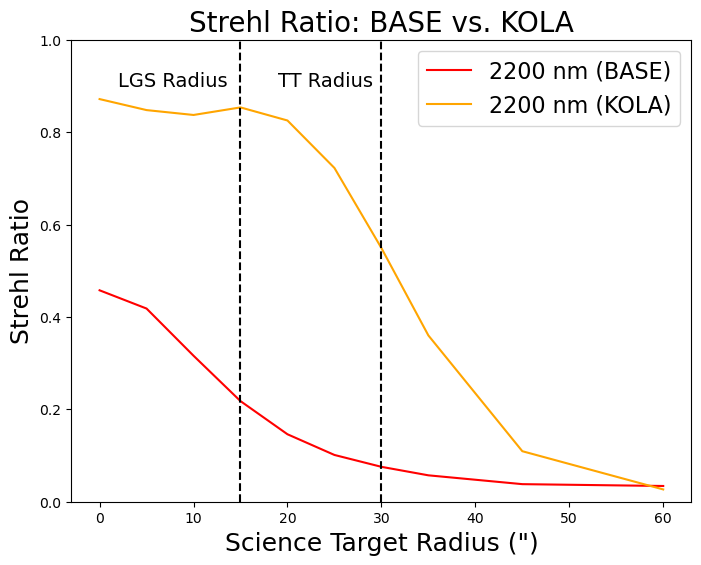

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], strehl_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], strehl_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
plt.text(x=2, y=.9, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
plt.text(x=19, y=.9, s="TT Radius", fontsize=14)

plt.ylim(0, 1)

plt.title("Strehl Ratio: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel("Strehl Ratio", fontsize=18)
plt.legend(fontsize=16)
plt.show()

<>:8: DeprecationWarning: invalid escape sequence '\m'
<>:8: DeprecationWarning: invalid escape sequence '\m'
/var/folders/53/n12zppt52s3448wqg8mrn39c00012j/T/ipykernel_6662/858014115.py:8: DeprecationWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength ($\mu$m)', fontsize=20)


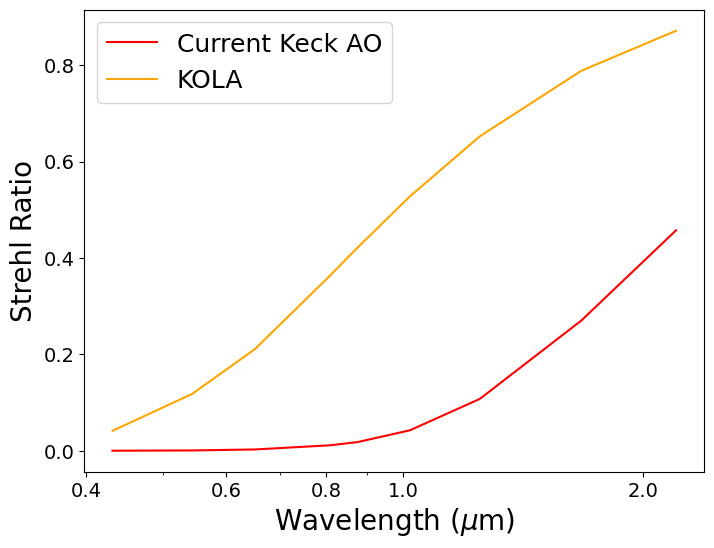

In [76]:
ticks = [0.4, 0.6, 0.8, 1.0, 2.0]  # Example ticks
labels = ['0.4', '0.6', '0.8', '1.0', '2.0']  # Labels

plt.figure(figsize=(8, 6))
plt.plot(wvl_base[0, :], strehl_base[0, :], color="red", label="Current Keck AO")
plt.plot(wvl_kola[0, :], strehl_kola[0, :], color="orange", label="KOLA")

plt.xlabel('Wavelength ($\mu$m)', fontsize=20)
plt.ylabel("Strehl Ratio", fontsize=20)
plt.legend(fontsize=18)

plt.xscale("log")
plt.xticks(ticks, labels, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

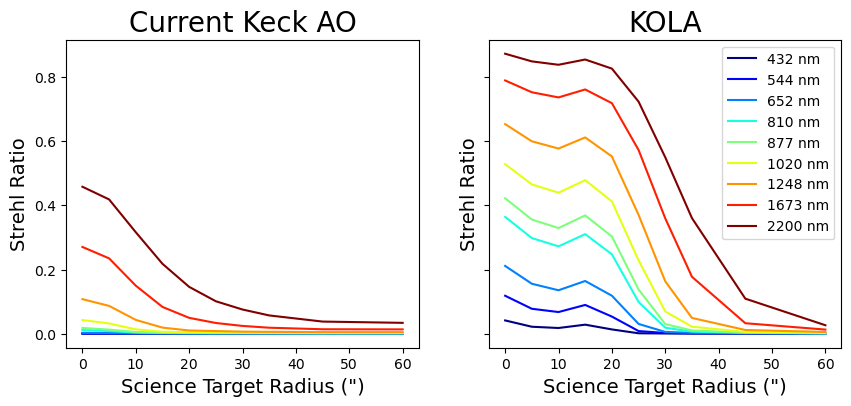

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for i in range(n_wvl_base):
    ax[0].plot(x_base[:, i], strehl_base[:, i], color=colors_base[i], label=f"{psf_wvl[i]} nm")
    ax[1].plot(x_kola[:, i], strehl_kola[:, i], color=colors_base[i], label=f"{psf_wvl[i]} nm")

ax[0].set_xlabel('Science Target Radius (")', fontsize=14)
ax[0].set_ylabel('Strehl Ratio', fontsize=14)
ax[0].set_title('Current Keck AO', fontsize=20)

ax[1].set_xlabel('Science Target Radius (")', fontsize=14)
ax[1].set_ylabel('Strehl Ratio', fontsize=14)
ax[1].set_title('KOLA', fontsize=20)

ax[1].legend()

## WFE

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], clos_xx_mean_nm_base[:,0], color="red", label="BASE")
plt.plot(x_kola[:, 8], clos_xx_mean_nm_kola[:,0], color="orange", label="KOLA")

plt.axvline(x = 15, color="black", linestyle = "--")
plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("Total Wavefront Error: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel("Total Wavefront Error (nm)", fontsize=18)
plt.legend(fontsize=16)
plt.show()

### FWHM 

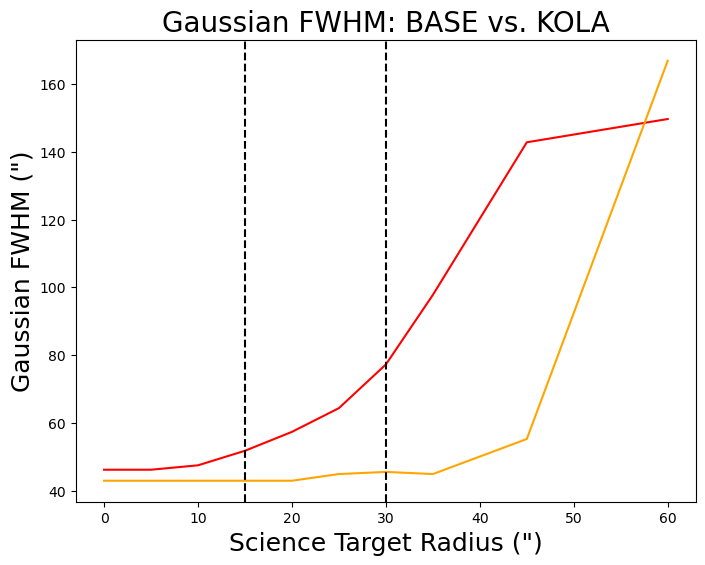

In [196]:
# Gaussian
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], fwhm_g_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], fwhm_g_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("Gaussian FWHM: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('Gaussian FWHM (")', fontsize=18)
#plt.legend(fontsize=16)
plt.show()

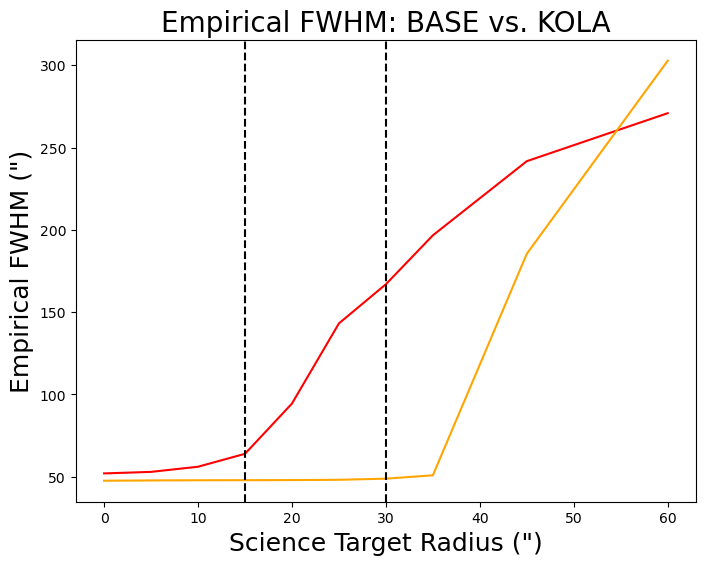

In [197]:
# Empirical
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], fwhm_e_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], fwhm_e_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("Empirical FWHM: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('Empirical FWHM (")', fontsize=18)
#plt.legend(fontsize=16)
plt.show()

## Encircled Energy

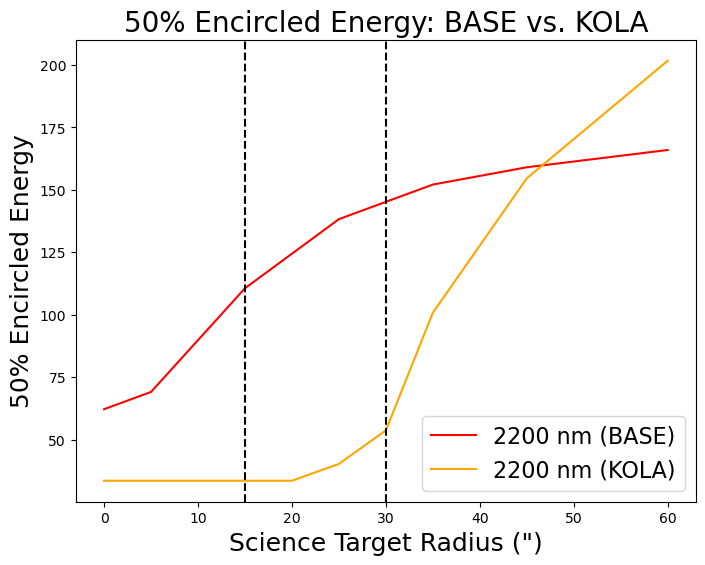

In [202]:
# 50
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], r_ee50_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], r_ee50_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("50% Encircled Energy: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('50% Encircled Energy', fontsize=18)
plt.legend(fontsize=16)
plt.show()

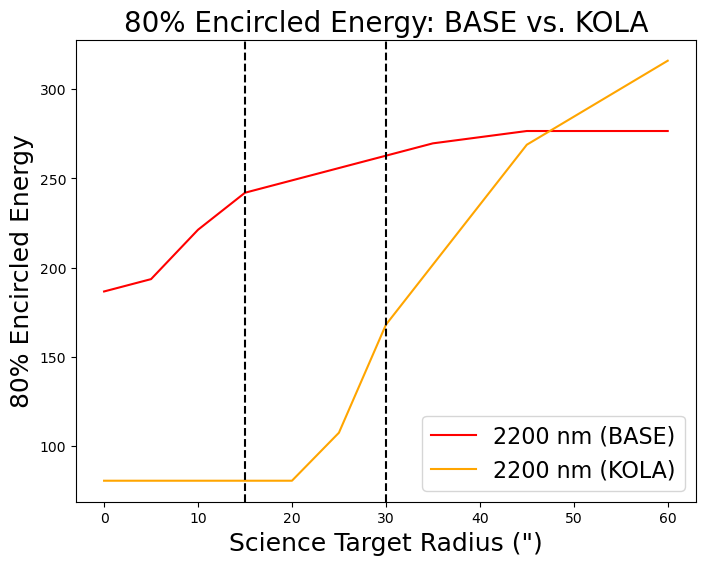

In [201]:
# 80
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], r_ee80_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], r_ee80_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("80% Encircled Energy: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('80% Encircled Energy', fontsize=18)
plt.legend(fontsize=16)
plt.show()

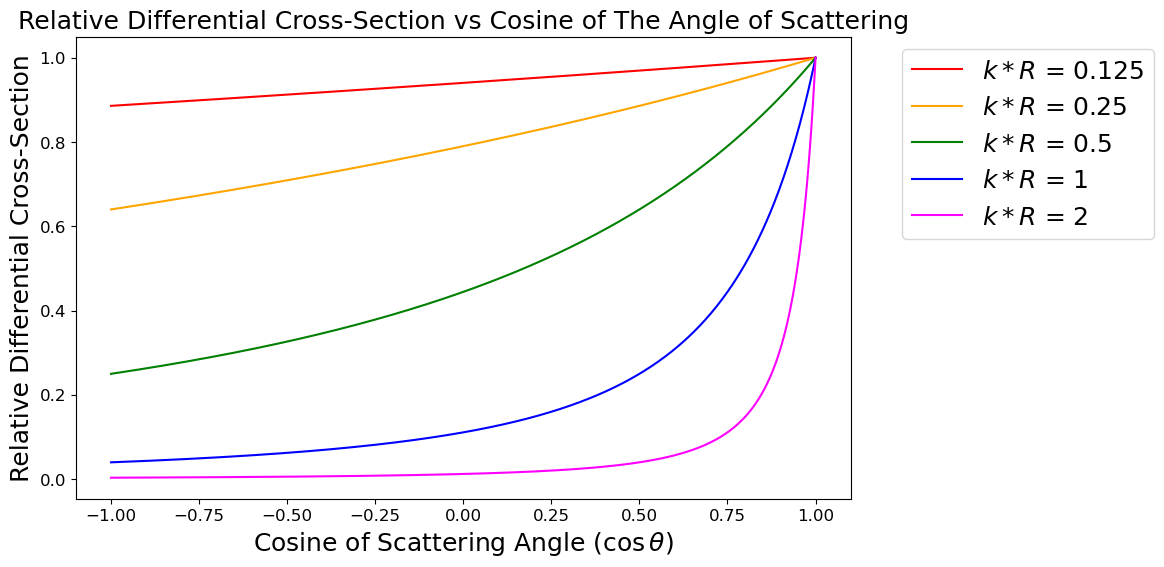

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
kR_values = [1/8, 1/4, 1/2, 1, 2]  # Values of k * R
cos_theta = np.linspace(-1, 1, 500)  # Cosine of the angle of scattering
theta = np.arccos(cos_theta)  # Scattering angle
colors = ["red", "orange", "green", "blue", "magenta"]

# Compute sin^2(theta/2) for differential cross-section
sin_theta_over_2_squared = (1 - cos_theta) / 2

# Function to compute relative differential cross-section
def relative_differential_cross_section(kR):
    return 1 / (1 + 4 * (kR**2) * sin_theta_over_2_squared)**2

# Plot relative differential cross-sections for each kR value
plt.figure(figsize=(10, 6))
for i, kR in enumerate(kR_values):
    cross_section = relative_differential_cross_section(kR)
    plt.plot(cos_theta, cross_section, label=f"$k*R$ = {kR}", color=colors[i])

# Plot customization
plt.title("Relative Differential Cross-Section vs Cosine of The Angle of Scattering", fontsize=18)
plt.xlabel(r"Cosine of Scattering Angle ($\cos\theta$)", fontsize=18)
plt.ylabel("Relative Differential Cross-Section", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


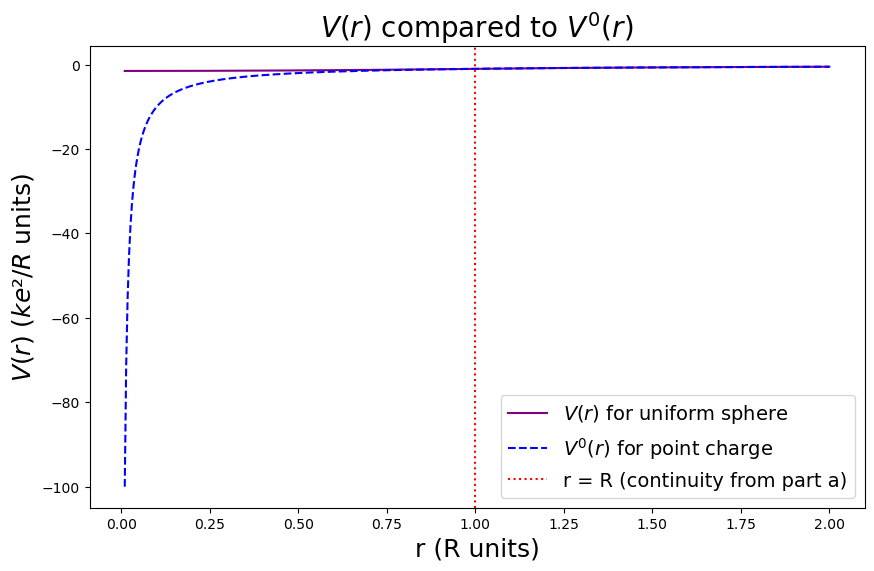

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_e = 1  # Coulomb's constant (arbitrary units for simplicity)
e = 1    # Charge of the proton/electron (arbitrary units)
R = 1    # Radius of the sphere (arbitrary units)

# Define the potential functions
def V_point(r):
    """Potential for a point charge."""
    return -k_e * e**2 / r

def V_uniform(r, R):
    """Potential for a charge uniformly spread within a sphere."""
    V = np.zeros_like(r)
    for i, r_val in enumerate(r):
        if r_val < R:
            V[i] = (-k_e * e**2 / (2 * R)) * (3 - (r_val**2 / R**2))
        else:
            V[i] = V_point(r_val)
    return V

# Range of r values
r = np.linspace(0.01, 2 * R, 500)  # Avoid r=0 to prevent division by zero in point potential

# Calculate potentials
V_uniform_vals = V_uniform(r, R)
V_point_vals = V_point(r)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r, V_uniform_vals / (k_e * e**2 / R), label="$V(r)$ for uniform sphere", color="purple")
plt.plot(r, V_point_vals / (k_e * e**2 / R), label="$V^0(r)$ for point charge", linestyle="--", color="blue")
plt.axvline(R, color="red", linestyle=":", label="r = R (continuity from part a)")
plt.xlabel("r (R units)", fontsize=18)
plt.ylabel("$V(r)$ ($ke²/R$ units)", fontsize=18)
plt.title("$V(r)$ compared to $V^0(r)$", fontsize=20)
plt.legend(fontsize=14)
plt.show()
